# Graph Theory: Airline Data
Source: https://www.analyticsvidhya.com/blog/2018/09/introduction-graph-theory-applications-python/
## 1) Overview
### Graph Theory
* Graph theory is the mapping of data connections using **vertices** (nodes/individual components) and **edges** (connections between vertices)
* It not only allows us to map the connections between data and networks but also to efficiently analyse these connections, extracting useful information from them in efficient ways

### Properties of Graphs
* Vertices:
    * A **vertex** is a single node in a graph
    * The **degree** of a vertex defines the number of edges connecting it to other vertices
    * **Eccentricity** defines the maximum number of connections between a single vertex and its furthest connected vertex
    * **Parallell edges** occur when two nodes are connected by more than one edge
* Graphs:
    * **Radius** is the minimum eccentricity of any vertex within the graph
    * **Diameter** is the maximum eccentricity of any vertex within the graph
    * **Central Points** are the vertices within a graph which connect to the most other vertices where their eccentricity is equal to the radius of the graph
    
### Graph Types
* **Directed** graphs contain one-way edges (e.g. when you follow someone on Twitter, they don't have to follow you back)
* **Undirected** graphs contain two-way edges only (e.g. when you add someone to your friends list on Facebook, you are also added to theirs)
* **Connected** graphs mean that all vertices are connected to all other vertices, whilst **Disconnected** graphs have some vertices which aren't connected to others within the graph
* **Regular** graphs occur when all vertices in the graph have the same exact degree (i.e. same number of edges connecting each vertex)

### Trees
* Trees are graphs where you begin with a **root node**, pass through **child nodes** and end up at **leaf nodes**
* They are graphs which must not contain cycles (i.e. each node must only connect to the root via one path)
* Traversing graphs requires methods that **only visit each node once** for efficiency and reliability
* There are several methods, including:
    * **Breadth-first** where you move to one level of the tree, horizontally search across all nodes at that level and then proceed to the next node. This process is fast but requires all elements to remain in memory which causes issues with larger trees
    * **Depth-first** where one full path from root to leaf is explored fully first, it is then dropped from memory before proceeding to the next full path and so on until each node has been searched. This method is better for memory but takes a lot of time
    * **Binary search** where rules are checked at each node (e.g. if < 50 go left, if >= 50 go right) and the search progresses logically from there. This method is fast (due to not requiring an exhaustive approach) and memory efficient (as it only searches the required path)
    
## 2) Graph Theory in Networkx & Python
### Airline Data
* This dataset shows us information such as date (year, month, day etc.), departure time, arrival time, origin, destination and distance travelled for various flights
* Some of these flights include multiple trips from one airport to another
* In order to view this data as a graph, we need to create vertices (airports) and edges (desired property of each flight)
* The aim is to determine the shortest route (edge) between each airport and we can do this using one of the two fields:
    * AirTime (flight time)
    * Distance (distance travelled)

In [10]:
# load libs
import pandas as pd
import numpy as np

# load data into df
data = pd.read_csv('airline_dummy_data.csv')

# peek at data
data.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,AirTime,Origin,Dest,Distance
0,2008,1,3,4,2003.0,1955,2211.0,2225,116.0,IAD,TPA,810
1,2008,1,3,4,754.0,735,1002.0,1000,113.0,IAD,TPA,810
2,2008,1,3,4,628.0,620,804.0,750,76.0,IND,BWI,515
3,2008,1,3,4,926.0,930,1054.0,1100,78.0,IND,BWI,515
4,2008,1,3,4,1829.0,1755,1959.0,1925,77.0,IND,BWI,515


### Networkx
* This library lets us both capture the vertices and edges of our data
* As well as visualize it in a simplistic manner for us to interpret

In [11]:
# load libs
import networkx as nx

# load data into nx object
# look at origin and destination as our source of vertices
df = nx.from_pandas_edgelist(data, source='Origin', target='Dest', edge_attr=True)

# peek at nodes (these are calculated automatically above)
df.nodes()

NodeView(('IAD', 'TPA', 'IND', 'BWI', 'JAX', 'LAS', 'MCI', 'MCO', 'MDW', 'PHX', 'ISP', 'FLL', 'PBI', 'RSW', 'JAN', 'HOU', 'BHM', 'BNA', 'ORF', 'PHL', 'ABQ', 'ALB', 'AMA', 'AUS', 'BDL', 'BOI', 'BUF', 'BUR', 'CLE', 'CMH', 'DEN', 'ELP', 'GEG', 'LAX', 'LBB', 'LIT', 'MAF', 'MHT', 'MSY', 'OAK', 'OKC', 'OMA', 'ONT', 'PDX', 'PIT', 'PVD', 'RDU', 'RNO', 'SAN', 'SAT', 'SDF', 'SEA', 'SFO', 'SJC', 'SLC', 'SMF', 'SNA', 'STL', 'TUL', 'TUS', 'DAL', 'DTW', 'HRL', 'CRP'))

In [21]:
# show first edge (also automatically calculated)
print([e for e in df.edges(data=True)][:1])

[('IAD', 'TPA', {'Year': 2008, 'Month': 1, 'DayofMonth': 18, 'DayOfWeek': 5, 'DepTime': 1910.0, 'CRSDepTime': 1915, 'ArrTime': 2134.0, 'CRSArrTime': 2145, 'AirTime': 128.0, 'Distance': 810})]


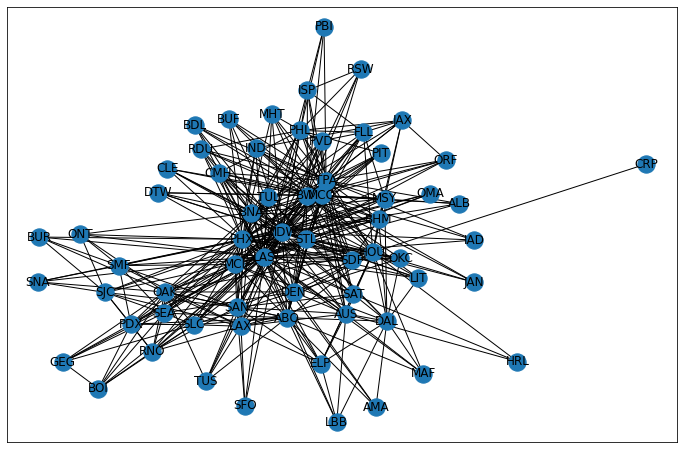

In [22]:
# load libs
import matplotlib.pyplot as plt
%matplotlib inline

# plot graph
plt.figure(figsize=(12,8))
nx.draw_networkx(df, with_labels=True)

## 3) Traversing the Graph
### Dijkstra’s shortest path algorithm
* If we want to caluculate the shortest path between two airports, we can use certain algorithms to help us
* We will use Dijkstra's shortest path algorithm here as it's built in to Networkx already
* The broad method of this (and other algorithms) though is as follows:
    * We already know the distances between each individual airport based on the input data
    * Create an empty set and initialize it with the origin airport of choice
    * Identify the closest airport to this origin airport and add it to the set with its distance
    * Calculate the distance between this new airport and it's adjacent airports
    * Identify the next closest airport to the origin airport
    * Continue this process until the entire graph is mapped (or until you've created the shortest path to your destination airport)
* We will implement the above process now

In [24]:
# find shortest path between specified airports
shortest_path_dist = nx.dijkstra_path(df, source='AMA', target='PBI', weight='Distance')
shortest_path_dist

['AMA', 'DAL', 'MSY', 'TPA', 'PBI']

In [26]:
# we can do the same, except looking at flight time instead of distance
shortest_path_time = nx.dijkstra_path(df, source='CRP', target='MAF', weight='AirTime')
shortest_path_time

['CRP', 'HOU', 'MAF']

## 4) Further Reading
Sources:
* [Text Mining](https://www.analyticsvidhya.com/blog/2019/10/how-to-build-knowledge-graph-text-using-spacy/?utm_source=blog&utm_medium=introduction-graph-theory-applications-python)
* [DeepWalk Feature Extraction](https://www.analyticsvidhya.com/blog/2019/11/graph-feature-extraction-deepwalk/?utm_source=blog&utm_medium=introduction-graph-theory-applications-python)
* [Facebook Link Prediction](https://www.analyticsvidhya.com/blog/2020/01/link-prediction-how-to-predict-your-future-connections-on-facebook/?utm_source=blog&utm_medium=introduction-graph-theory-applications-python)
* [Cricket Network Analysis](https://www.analyticsvidhya.com/blog/2020/02/network-analysis-ipl-data/?utm_source=blog&utm_medium=introduction-graph-theory-applications-python)